In [2]:
from typing import TypedDict, Optional  # library for annotations
from langgraph.graph import StateGraph
from rich.jupyter import display

In [22]:
# State
class AgentState(TypedDict):
    message: Optional[str]
    name: Optional[str]

In [23]:
# Node
def start_node(state: AgentState) -> AgentState:  # should only accept State
    """A simple welcoming node"""
    if state['name']:
        name = state['name']
        state['message'] += f" Nice to meet you, {name}!"
    else:
        state['message'] += " Nice to meet you!"
    return state

In [24]:
# StateGraph
graph = StateGraph(AgentState)
graph.add_node("start_node", start_node)
graph.set_entry_point("start_node")
graph.set_finish_point("start_node")
app = graph.compile()

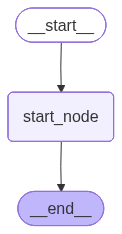

In [25]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
result = app.invoke({"message": "Hello!", "name" : "Steo"})
print(result["message"])  # as the node is changing the state["message"]

Hello! Nice to meet you, Steo!
